In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

from tensorflow.keras import layers

2023-05-03 18:06:34.042546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15, norm=False, savefig=False):
    # Create the confustion matrix
    plt.rcParams.update({"font.size": text_size})
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / \
        cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with
    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    # colors will represent how 'correct' a class is, darker == better
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           # create enough axis slots for each class
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           # axes will labeled with class names (if they exist) or ints
           xticklabels=labels,
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)
    plt.show()

In [3]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
  layers.RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
])

2023-05-03 18:06:36.398672: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# control how many image we want to augment
factor = 20

# Set the image size for resizing
IMG_SIZE = 224

Train set shape: (251, 224, 224)
Train set[0] shape: (224, 224)
before
(5020, 224, 224, 1)
after
(5020, 50176)
K-NN Algorithm with train dataset

Accuracy: 0.7671812749003984
Precision: 0.8222097482608816
Recall: 0.7198831913795424
F1 score: 0.711801574297176
Classification Report:
                  precision    recall  f1-score   support

          Covid       0.72      1.00      0.84      1798
         Normal       0.94      0.31      0.47      1114
Viral Pneumonia       0.81      0.85      0.83      1104

       accuracy                           0.77      4016
      macro avg       0.82      0.72      0.71      4016
   weighted avg       0.81      0.77      0.73      4016



/Users/zephyr/opt/anaconda3/envs/ai2_310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<Figure size 2000x2000 with 0 Axes>

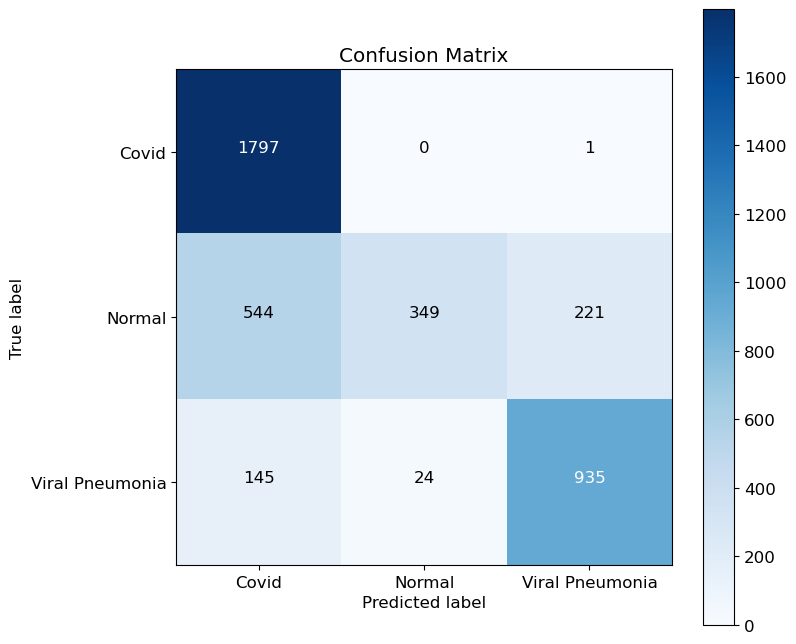

/Users/zephyr/opt/anaconda3/envs/ai2_310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-NN Algorithm with validation dataset

Accuracy: 0.700199203187251
Precision: 0.7386034255599473
Recall: 0.652100999849815
F1 score: 0.6133334780053746
Classification Report:
                  precision    recall  f1-score   support

          Covid       0.65      1.00      0.78       422
         Normal       0.76      0.15      0.25       286
Viral Pneumonia       0.81      0.81      0.81       296

       accuracy                           0.70      1004
      macro avg       0.74      0.65      0.61      1004
   weighted avg       0.73      0.70      0.64      1004



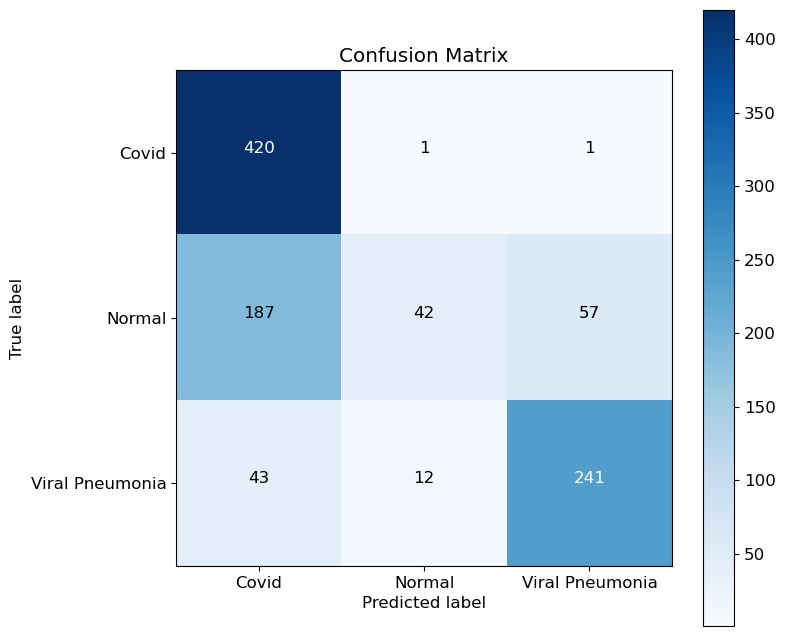

K-NN Algorithm with test dataset

Accuracy: 0.6666666666666666
Precision: 0.6349206349206349
Recall: 0.6371794871794872
F1 score: 0.6290849673202614
Classification Report:
                  precision    recall  f1-score   support

          Covid       0.83      0.96      0.89        26
         Normal       0.57      0.40      0.47        20
Viral Pneumonia       0.50      0.55      0.52        20

       accuracy                           0.67        66
      macro avg       0.63      0.64      0.63        66
   weighted avg       0.65      0.67      0.65        66



/Users/zephyr/opt/anaconda3/envs/ai2_310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


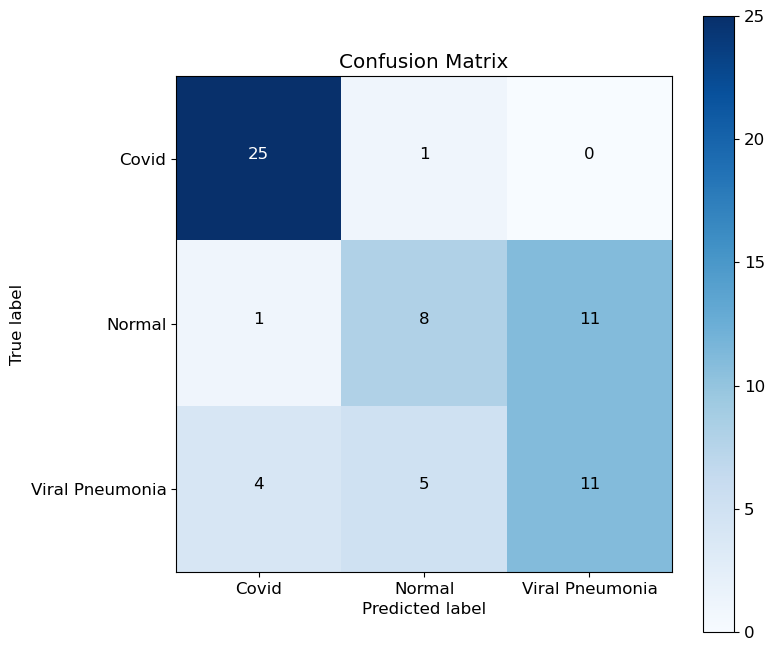

In [14]:
# K-NN

import numpy as np
import os
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Set the paths to the train and test image directories
train_path = 'Covid19-dataset/train'
test_path = 'Covid19-dataset/test'

# Initialize lists for the images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []
classes_labels = []

# Loop through the train subfolders and load the train images
for folder in os.listdir(train_path):
    label = folder
    if folder in ['.DS_Store']:
        continue
    classes_labels.append(label)
    for file in os.listdir(os.path.join(train_path,folder)):
        img_path = os.path.join(train_path,folder,file)
        
        # Read the image file and resize it
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        # Append the image and label to the train lists
        train_images.append(img)
        train_labels.append(label)

# Loop through the test subfolders and load the test images
for folder in os.listdir(test_path):
    label = folder
    if folder in ['.DS_Store']:
        continue
    for file in os.listdir(os.path.join(test_path,folder)):
        img_path = os.path.join(test_path,folder,file)
        
        # Read the image file and resize it
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        # Append the image and label to the test lists
        test_images.append(img)
        test_labels.append(label)

# Convert the train and test images and labels to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

augmented_images = []
augmented_labels = []


print('Train set shape:', train_images.shape)
print('Train set[0] shape:', train_images[0].shape)
plt.figure(figsize=(20, 20))



# Flatten the image data to a 1D array
n_train_samples = train_images.shape[0]

for i in range(n_train_samples):
    image = train_images[i].reshape(IMG_SIZE, IMG_SIZE, 1)
    label = train_labels[i]
    for _ in range(factor):
        augmented_image = data_augmentation(image)
        # X_train.reshape(31500, 28, 28, 1)
        # print(augmented_image.shape)
        augmented_images.append(augmented_image)
        augmented_labels.append(label)

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

print("before")
print(augmented_images.shape)

augmented_images = augmented_images.reshape((n_train_samples * factor, -1))

print("after")
print(augmented_images.shape)

augmented_train_images, augmented_validation_images, augmented_train_labels, augmented_validation_labels = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)


n_test_samples = test_images.shape[0]
test_images = test_images.reshape((n_test_samples, -1))

# Define the k-NN classifier and fit it to the training data
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
# knn.fit(train_images, train_labels)
knn.fit(augmented_train_images, augmented_train_labels)

# Use the trained classifier to make predictions on the trained data
train_predictions = knn.predict(augmented_train_images)


# Calculate the evaluation metrics
accuracy = accuracy_score(augmented_train_labels, train_predictions)
precision = precision_score(augmented_train_labels, train_predictions, average='macro')
recall = recall_score(augmented_train_labels, train_predictions, average='macro')
f1 = f1_score(augmented_train_labels, train_predictions, average='macro')
report = classification_report(augmented_train_labels, train_predictions)

# Print the evaluation metrics and classification report
print('K-NN Algorithm with train dataset\n')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Classification Report:\n', report)
make_confusion_matrix(y_true=augmented_train_labels,
                      y_pred=train_predictions,
                      classes=knn.classes_.tolist(),
                      figsize=(8, 8),
                      text_size=12)

# Use the trained classifier to make predictions on the trained data
validation_predictions = knn.predict(augmented_validation_images)


# Calculate the evaluation metrics
accuracy = accuracy_score(augmented_validation_labels, validation_predictions)
precision = precision_score(augmented_validation_labels, validation_predictions, average='macro')
recall = recall_score(augmented_validation_labels, validation_predictions, average='macro')
f1 = f1_score(augmented_validation_labels, validation_predictions, average='macro')
report = classification_report(augmented_validation_labels, validation_predictions)

# Print the evaluation metrics and classification report
print('K-NN Algorithm with validation dataset\n')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Classification Report:\n', report)
make_confusion_matrix(y_true=augmented_validation_labels,
                      y_pred=validation_predictions,
                      classes=knn.classes_.tolist(),
                      figsize=(8, 8),
                      text_size=12)


# Use the trained classifier to make predictions on the test data
test_predictions = knn.predict(test_images)


# Calculate the evaluation metrics
accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
f1 = f1_score(test_labels, test_predictions, average='macro')
report = classification_report(test_labels, test_predictions)

# Print the evaluation metrics and classification report
print('K-NN Algorithm with test dataset\n')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Classification Report:\n', report)
make_confusion_matrix(y_true=test_labels,
                      y_pred=test_predictions,
                      classes=knn.classes_.tolist(),
                      figsize=(8, 8),
                      text_size=12)

before
(5020, 224, 224, 1)
after
(5020, 50176)
SVM Algorithm with train dataset

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Classification Report:
                  precision    recall  f1-score   support

          Covid       1.00      1.00      1.00      1798
         Normal       1.00      1.00      1.00      1114
Viral Pneumonia       1.00      1.00      1.00      1104

       accuracy                           1.00      4016
      macro avg       1.00      1.00      1.00      4016
   weighted avg       1.00      1.00      1.00      4016



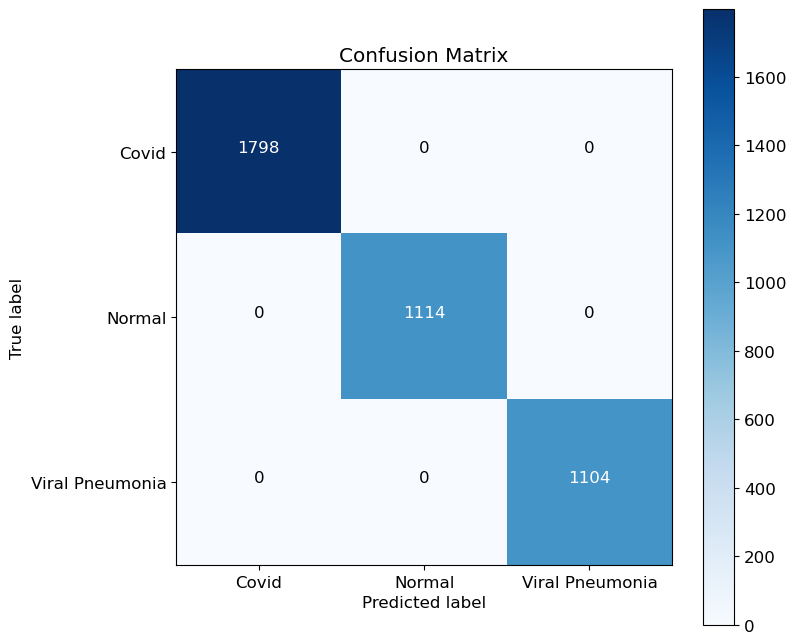

SVM Algorithm with validation dataset

Accuracy: 0.5129482071713147
Precision: 0.5075839430902773
Recall: 0.4703900077122826
F1 score: 0.4614191389957407
Classification Report:
                  precision    recall  f1-score   support

          Covid       0.51      0.79      0.62       422
         Normal       0.43      0.21      0.29       286
Viral Pneumonia       0.58      0.41      0.48       296

       accuracy                           0.51      1004
      macro avg       0.51      0.47      0.46      1004
   weighted avg       0.51      0.51      0.48      1004



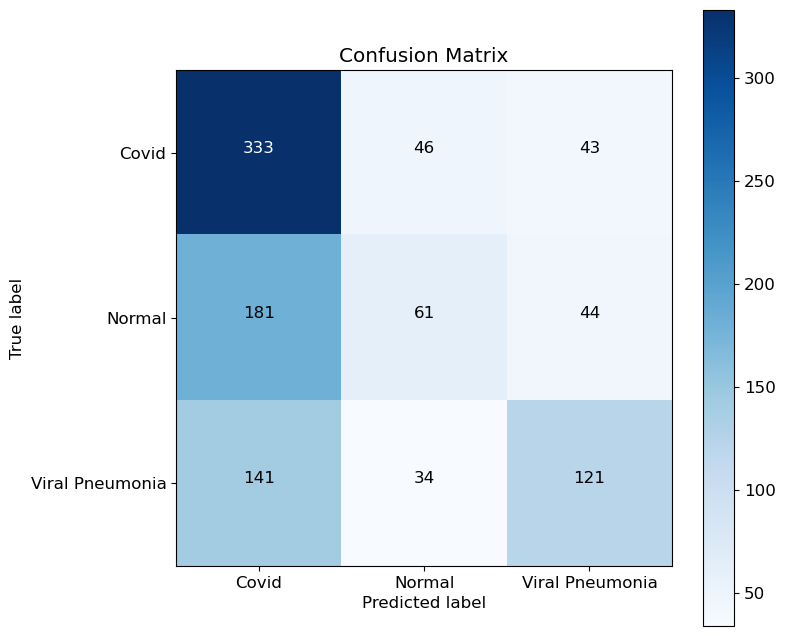

SVM Algorithm with test dataset

Accuracy: 0.5303030303030303
Precision: 0.48353280706221885
Recall: 0.5102564102564102
F1 score: 0.48700935396450734
Classification Report:
                  precision    recall  f1-score   support

          Covid       0.56      0.73      0.63        26
         Normal       0.27      0.15      0.19        20
Viral Pneumonia       0.62      0.65      0.63        20

       accuracy                           0.53        66
      macro avg       0.48      0.51      0.49        66
   weighted avg       0.49      0.53      0.50        66



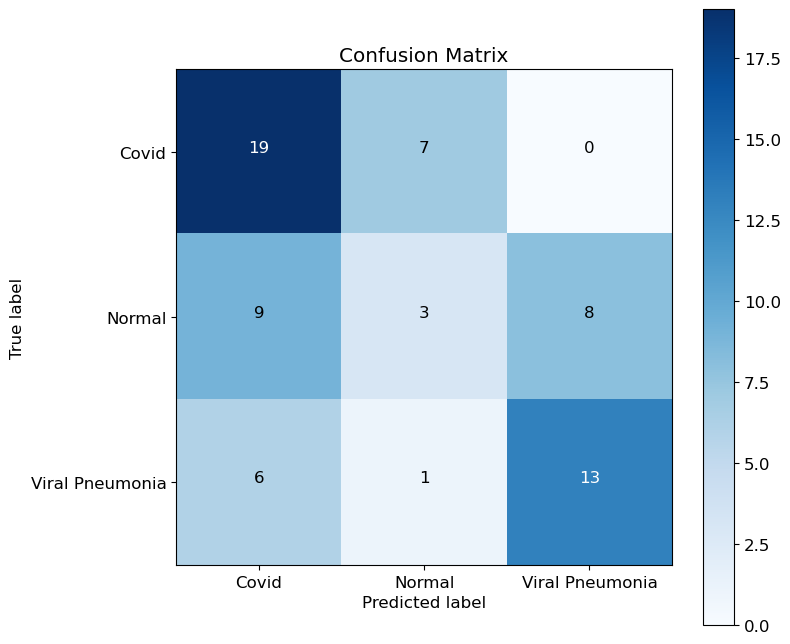

In [15]:
# SVM

import numpy as np
import os
import cv2
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Set the paths to the train and test image directories
train_path = 'Covid19-dataset/train'
test_path = 'Covid19-dataset/test'

# Initialize lists for the images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []
classes_labels = []

# Loop through the train subfolders and load the train images
for folder in os.listdir(train_path):
    label = folder
    if folder in ['.DS_Store']:
        continue
    classes_labels.append(label)
    for file in os.listdir(os.path.join(train_path,folder)):
        img_path = os.path.join(train_path,folder,file)
        
        # Read the image file and resize it
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        # Append the image and label to the train lists
        train_images.append(img)
        train_labels.append(label)

# Loop through the test subfolders and load the test images
for folder in os.listdir(test_path):
    label = folder
    if folder in ['.DS_Store']:
        continue
    for file in os.listdir(os.path.join(test_path,folder)):
        img_path = os.path.join(test_path,folder,file)
        
        # Read the image file and resize it
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        # Append the image and label to the test lists
        test_images.append(img)
        test_labels.append(label)

# Convert the train and test images and labels to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

augmented_images = []
augmented_labels = []

# Flatten the image data to a 1D array
n_train_samples = train_images.shape[0]

for i in range(n_train_samples):
    image = train_images[i].reshape(IMG_SIZE, IMG_SIZE, 1)
    label = train_labels[i]
    for _ in range(factor):
        augmented_image = data_augmentation(image)
        # X_train.reshape(31500, 28, 28, 1)
        # print(augmented_image.shape)
        augmented_images.append(augmented_image)
        augmented_labels.append(label)

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

print("before")
print(augmented_images.shape)

augmented_images = augmented_images.reshape((n_train_samples * factor, -1))

print("after")  
print(augmented_images.shape)

augmented_train_images, augmented_validation_images, augmented_train_labels, augmented_validation_labels = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)


n_test_samples = test_images.shape[0]
test_images = test_images.reshape((n_test_samples, -1))

# Convert the labels to integers
# le = LabelEncoder()
# train_labels = le.fit_transform(train_labels)
# test_labels = le.transform(test_labels)



# Define the SVM classifier and fit it to the training data
svm = SVC(kernel='linear', C=1, probability=True, random_state=42)

svm.fit(augmented_train_images, augmented_train_labels)

# Use the trained classifier to make predictions on the train data
train_predictions = svm.predict(augmented_train_images)

# Calculate the evaluation metrics
accuracy = accuracy_score(augmented_train_labels, train_predictions)
precision = precision_score(augmented_train_labels, train_predictions, average='macro')
recall = recall_score(augmented_train_labels, train_predictions, average='macro')
f1 = f1_score(augmented_train_labels, train_predictions, average='macro')
report = classification_report(augmented_train_labels, train_predictions)

# Print the evaluation metrics and classification report
print('SVM Algorithm with train dataset\n')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Classification Report:\n', report)
make_confusion_matrix(y_true=augmented_train_labels,
                      y_pred=train_predictions,
                      classes=svm.classes_.tolist(),
                      figsize=(8, 8),
                      text_size=12)

# Use the trained classifier to make predictions on the test data
validation_predictions = svm.predict(augmented_validation_images)

# Calculate the evaluation metrics
accuracy = accuracy_score(augmented_validation_labels, validation_predictions)
precision = precision_score(augmented_validation_labels, validation_predictions, average='macro')
recall = recall_score(augmented_validation_labels, validation_predictions, average='macro')
f1 = f1_score(augmented_validation_labels, validation_predictions, average='macro')
report = classification_report(augmented_validation_labels, validation_predictions)

# Print the evaluation metrics and classification report
print('SVM Algorithm with validation dataset\n')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Classification Report:\n', report)
make_confusion_matrix(y_true=augmented_validation_labels,
                      y_pred=validation_predictions,
                      classes=svm.classes_.tolist(),
                      figsize=(8, 8),
                      text_size=12)

# Use the trained classifier to make predictions on the test data
test_predictions = svm.predict(test_images)

# Calculate the evaluation metrics
accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
f1 = f1_score(test_labels, test_predictions, average='macro')
report = classification_report(test_labels, test_predictions)

# Print the evaluation metrics and classification report
print('SVM Algorithm with test dataset\n')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Classification Report:\n', report)
make_confusion_matrix(y_true=test_labels,
                      y_pred=test_predictions,
                      classes=svm.classes_.tolist(),
                      figsize=(8, 8),
                      text_size=12)

In [81]:
import tensorflow as tf
# List available GPUs
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

Num GPUs Available:  0


(251, 224, 224)
Epoch 1/10
126/126 [==============================] - 86s 677ms/step - loss: 0.8593 - accuracy: 0.5891
Epoch 2/10
126/126 [==============================] - 90s 712ms/step - loss: 0.5428 - accuracy: 0.7632
Epoch 3/10
126/126 [==============================] - 91s 725ms/step - loss: 0.4360 - accuracy: 0.8180
Epoch 4/10
126/126 [==============================] - 93s 739ms/step - loss: 0.3243 - accuracy: 0.8658
Epoch 5/10
126/126 [==============================] - 96s 762ms/step - loss: 0.2689 - accuracy: 0.8982
Epoch 6/10
126/126 [==============================] - 95s 752ms/step - loss: 0.2089 - accuracy: 0.9178
Epoch 7/10
126/126 [==============================] - 97s 766ms/step - loss: 0.1135 - accuracy: 0.9589
Epoch 8/10
126/126 [==============================] - 96s 763ms/step - loss: 0.0629 - accuracy: 0.9796
Epoch 9/10
126/126 [==============================] - 98s 774ms/step - loss: 0.0483 - accuracy: 0.9831
Epoch 10/10
126/126 [==============================] - 31

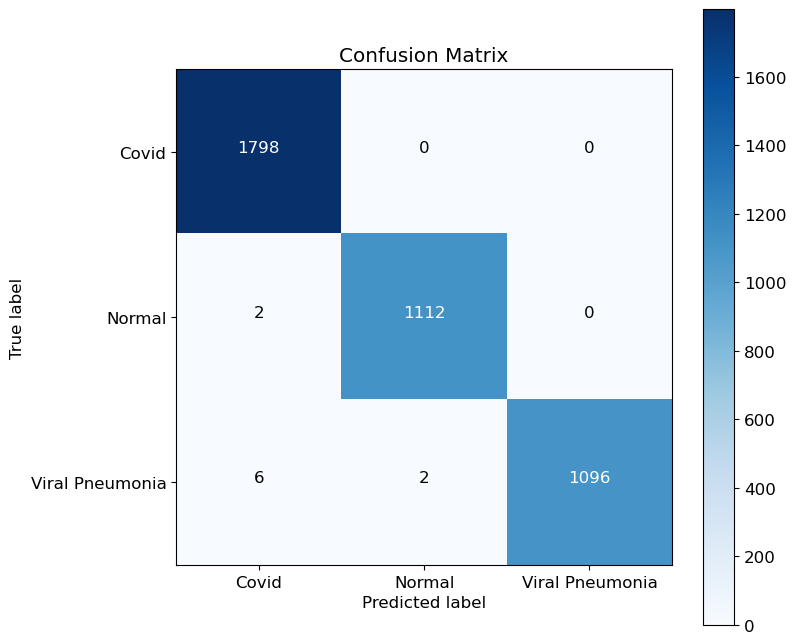

32/32 [==============================] - 8s 245ms/step

CNN Algorithm with validation dataset

Accuracy: 0.8017928286852589
Precision: 0.789046107688809
Recall: 0.7816536501370625
F1 score: 0.7841795257244929
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       422
           1       0.73      0.67      0.70       286
           2       0.78      0.74      0.76       296

    accuracy                           0.80      1004
   macro avg       0.79      0.78      0.78      1004
weighted avg       0.80      0.80      0.80      1004

<class 'list'>
['Viral Pneumonia', 'Normal', 'Covid']
['Covid' 'Normal' 'Viral Pneumonia']


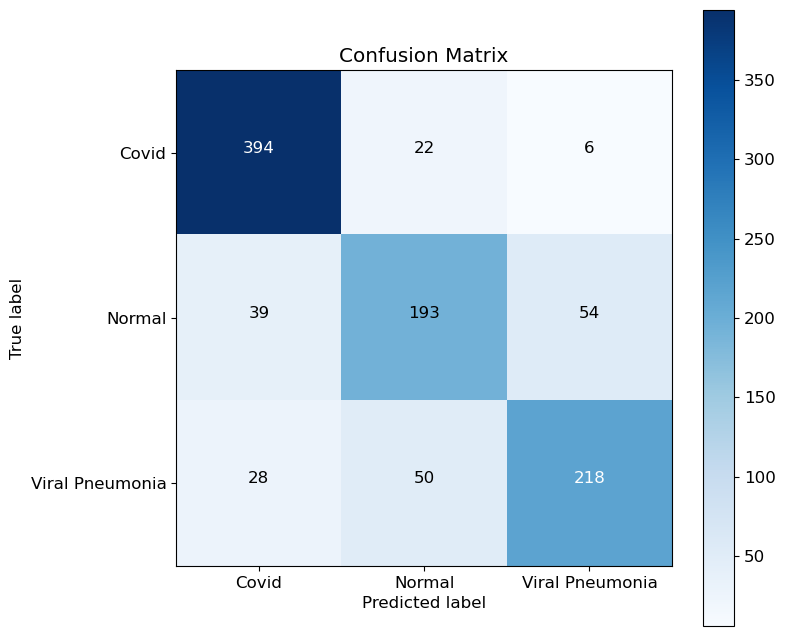

3/3 [==============================] - 1s 132ms/step

CNN Algorithm with test dataset

Accuracy: 0.7424242424242424
Precision: 0.7620192307692308
Recall: 0.735897435897436
F1 score: 0.7232802658334574
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89        26
           1       0.59      0.95      0.73        20
           2       0.69      0.45      0.55        20

    accuracy                           0.74        66
   macro avg       0.76      0.74      0.72        66
weighted avg       0.78      0.74      0.74        66

<class 'list'>
['Viral Pneumonia', 'Normal', 'Covid']
['Covid' 'Normal' 'Viral Pneumonia']


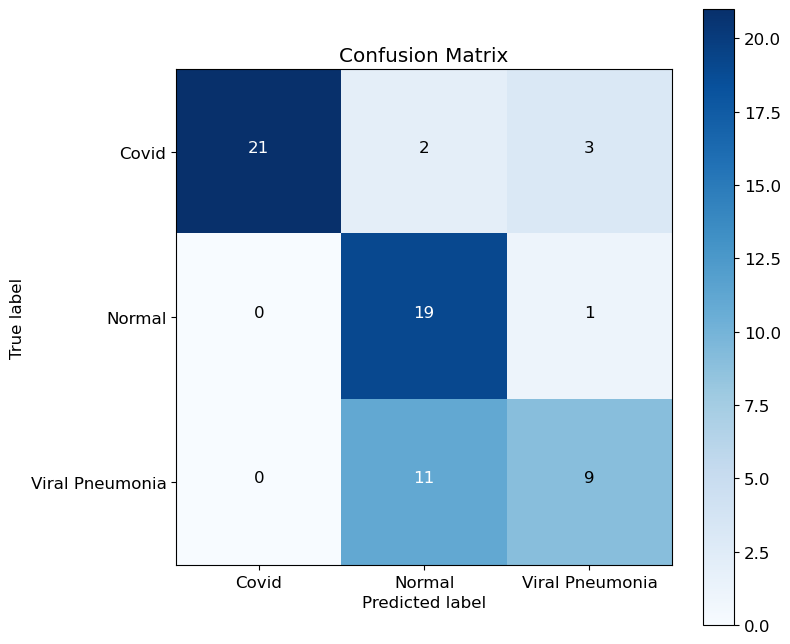

In [16]:
# CNN

import numpy as np
import os
import cv2
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Set the paths to the train and test image directories
train_path = 'Covid19-dataset/train'
test_path = 'Covid19-dataset/test'

# Initialize lists for the images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []
classes_labels = []

# Loop through the train subfolders and load the train images
for folder in os.listdir(train_path):
    if folder in ['.DS_Store']:
        continue
    label = folder
    classes_labels.append(label)
    for file in os.listdir(os.path.join(train_path,folder)):
        img_path = os.path.join(train_path,folder,file)
        
        # Read the image file and resize it
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        # Append the image and label to the train lists
        train_images.append(img)
        train_labels.append(label)

# Loop through the test subfolders and load the test images
for folder in os.listdir(test_path):
    if folder in ['.DS_Store']:
        continue
    label = folder
    
    for file in os.listdir(os.path.join(test_path,folder)):
        img_path = os.path.join(test_path,folder,file)
        
        # Read the image file and resize it
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # print(img.shape)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        # print(img.shape)
        # Append the image and label to the test lists
        test_images.append(img)
        test_labels.append(label)

# Encode the train and test labels as integer values
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)


# Convert the train and test images to numpy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)
print(train_images.shape)

augmented_images = []
augmented_labels = []

n_train_samples = train_images.shape[0]

for i in range(n_train_samples):
    image = train_images[i].reshape(IMG_SIZE, IMG_SIZE, 1)
    label = train_labels[i]
    for _ in range(factor):
        augmented_image = data_augmentation(image)
        # X_train.reshape(31500, 28, 28, 1)
        # print(augmented_image.shape)
        augmented_images.append(augmented_image)
        augmented_labels.append(label)

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# print("before")
# print(augmented_images.shape)

# augmented_images = augmented_images.reshape((n_train_samples * factor, -1))

# print("after")  
# print(augmented_images.shape)

augmented_train_images, augmented_validation_images, augmented_train_labels, augmented_validation_labels = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

# Normalize the image data to values between 0 and 1
train_images = train_images / 255.0
augmented_train_images = augmented_train_images / 255.0
augmented_validation_images = augmented_validation_images / 255.0

test_images = test_images.reshape(test_images.shape[0],IMG_SIZE, IMG_SIZE, 1) / 255.0

# One-hot encode the labels
num_classes = len(np.unique(train_labels))
train_labels = to_categorical(train_labels, num_classes)
augmented_train_labels = to_categorical(augmented_train_labels, num_classes)
augmented_validation_labels = to_categorical(augmented_validation_labels, num_classes)

test_labels = to_categorical(test_labels, num_classes)

# Define the CNN model
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model with categorical crossentropy loss and Adam optimizer
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
cnn.fit(augmented_train_images, augmented_train_labels, epochs=10)




# Evaluate the model on the train data
train_loss, train_acc = cnn.evaluate(augmented_train_images, augmented_train_labels)

# Use the trained model to make predictions on the test data
train_predictions = cnn.predict(augmented_train_images)
train_predictions = np.argmax(train_predictions, axis=1)

# Calculate the evaluation metrics
accuracy = accuracy_score(np.argmax(augmented_train_labels, axis=1), train_predictions)
precision = precision_score(np.argmax(augmented_train_labels, axis=1), train_predictions, average='macro')
recall = recall_score(np.argmax(augmented_train_labels, axis=1), train_predictions, average='macro')
f1 = f1_score(np.argmax(augmented_train_labels, axis=1), train_predictions, average='macro')

# Generate the classification report
report = classification_report(np.argmax(augmented_train_labels, axis=1), train_predictions)

# Print the evaluation metrics and classification report
print('\nCNN Algorithm with train dataset\n')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Classification Report:\n', report)
# print(np.argmax(augmented_train_labels, axis=1))
# print(train_predictions)
print(type(classes_labels))
print(classes_labels)
print(label_encoder.classes_)
make_confusion_matrix(y_true=np.argmax(augmented_train_labels, axis=1),
                      y_pred=train_predictions,
                      classes=label_encoder.classes_.tolist(),
                      figsize=(8, 8),
                      text_size=12)

# Evaluate the model on the test data
validation_loss, validation_acc = cnn.evaluate(augmented_validation_images, augmented_validation_labels)

# Use the trained model to make predictions on the test data
validation_predictions = cnn.predict(augmented_validation_images)
validation_predictions = np.argmax(validation_predictions, axis=1)

# Calculate the evaluation metrics
accuracy = accuracy_score(np.argmax(augmented_validation_labels, axis=1), validation_predictions)
precision = precision_score(np.argmax(augmented_validation_labels, axis=1), validation_predictions, average='macro')
recall = recall_score(np.argmax(augmented_validation_labels, axis=1), validation_predictions, average='macro')
f1 = f1_score(np.argmax(augmented_validation_labels, axis=1), validation_predictions, average='macro')

# Generate the classification report
report = classification_report(np.argmax(augmented_validation_labels, axis=1), validation_predictions)

# Print the evaluation metrics and classification report
print('\nCNN Algorithm with validation dataset\n')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Classification Report:\n', report)
# print(np.argmax(augmented_validation_labels, axis=1))
# print(validation_predictions)
print(type(classes_labels))
print(classes_labels)
print(label_encoder.classes_)
make_confusion_matrix(y_true=np.argmax(augmented_validation_labels, axis=1),
                      y_pred=validation_predictions,
                      classes=label_encoder.classes_.tolist(),
                      figsize=(8, 8),
                      text_size=12)

# Evaluate the model on the test data
test_loss, test_acc = cnn.evaluate(test_images, test_labels)

# Use the trained model to make predictions on the test data
test_predictions = cnn.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate the evaluation metrics
accuracy = accuracy_score(np.argmax(test_labels, axis=1), test_predictions)
precision = precision_score(np.argmax(test_labels, axis=1), test_predictions, average='macro')
recall = recall_score(np.argmax(test_labels, axis=1), test_predictions, average='macro')
f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='macro')

# Generate the classification report
report = classification_report(np.argmax(test_labels, axis=1), test_predictions)

# Print the evaluation metrics and classification report
print('\nCNN Algorithm with test dataset\n')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Classification Report:\n', report)
# print(np.argmax(test_labels, axis=1))
# print(test_predictions)
print(type(classes_labels))
print(classes_labels)
print(label_encoder.classes_)
make_confusion_matrix(y_true=np.argmax(test_labels, axis=1),
                      y_pred=test_predictions,
                      classes=label_encoder.classes_.tolist(),
                      figsize=(8, 8),
                      text_size=12)

In [6]:
# FFNN

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf

# Load the image data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    'Covid19-dataset/train',
    color_mode='grayscale',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=42,
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'Covid19-dataset/test',
    color_mode='grayscale',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=False,
    seed=42,
)

# Extract the image data and labels from the data sets
train_images = np.concatenate([x for x, y in train_data], axis=0)
train_labels = np.concatenate([y for x, y in train_data], axis=0)
test_images = np.concatenate([x for x, y in test_data], axis=0)
test_labels = np.concatenate([y for x, y in test_data], axis=0)

augmented_images = []
augmented_labels = []

n_train_samples = train_images.shape[0]

for i in range(n_train_samples):
    image = train_images[i].reshape(IMG_SIZE, IMG_SIZE, 1)
    label = train_labels[i]
    for _ in range(factor):
        augmented_image = data_augmentation(image)
        # X_train.reshape(31500, 28, 28, 1)
        # print(augmented_image.shape)
        augmented_images.append(augmented_image)
        augmented_labels.append(label)

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

augmented_train_images, augmented_validation_images, augmented_train_labels, augmented_validation_labels = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

# Define the model architecture
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

ffnn = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(224, 224, 3)), # Define the input shape and data type
    tf.keras.layers.Flatten(input_shape=(224, 224, 1), name='Flatten_1'),
    tf.keras.layers.Dense(512, activation='relu', name = 'Dense_1'),
    tf.keras.layers.Dense(256, activation='relu', name = 'Dense_2'),
    tf.keras.layers.Dense(128, activation='relu', name = 'Dense_3'),
    tf.keras.layers.Dense(3, activation='softmax', name = 'Dense_4')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

# Compile the model
ffnn.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(train_labels.shape)
print(augmented_train_images.shape)
print(augmented_train_labels.shape)

# Train the model
ffnn.fit(augmented_train_images, augmented_train_labels, epochs=100)



Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
(251, 3)
(4016, 224, 224, 1)
(4016, 3)
Epoch 1/100
126/126 [==============================] - 9s 66ms/step - loss: 20.7055 - accuracy: 0.3379
Epoch 2/100
126/126 [==============================] - 8s 66ms/step - loss: 9.4717 - accuracy: 0.3723
Epoch 3/100
126/126 [==============================] - 8s 66ms/step - loss: 7.0525 - accuracy: 0.3802
Epoch 4/100
126/126 [==============================] - 8s 66ms/step - loss: 6.0400 - accuracy: 0.3835
Epoch 5/100
126/126 [==============================] - 8s 67ms/step - loss: 5.9552 - accuracy: 0.3822
Epoch 6/100
126/126 [==============================] - 8s 66ms/step - loss: 4.2989 - accuracy: 0.4255
Epoch 7/100
126/126 [==============================] - 8s 66ms/step - loss: 4.4732 - accuracy: 0.3917
Epoch 8/100
126/126 [==============================] - 8s 66ms/step - loss: 4.6233 - accuracy: 0.3982
Epoch 9/100
126/126 [==============================] - 8s 66ms/st

In [10]:
train_data.class_names

['Covid', 'Normal', 'Viral Pneumonia']

126/126 [==============================] - 5s 39ms/step

FFNN Algorithm with train dataset

Train accuracy: 0.7985557768924303


Classification report:
Covid precision: 0.9761499148211243
Covid recall: 0.6503972758229285
Covid F1 score: 0.7806539509536785
Normal precision: 0.7555385790679908
Normal recall: 0.8814616755793226
Normal F1 score: 0.8136569313039902
Viral Pneumonia precision: 0.6992824527071102
Viral Pneumonia recall: 0.9469964664310954
Viral Pneumonia F1 score: 0.8045028142589117
Average precision: 0.8103236488654084
Average recall: 0.8262851392777821
Average F1 score: 0.7996045655055268


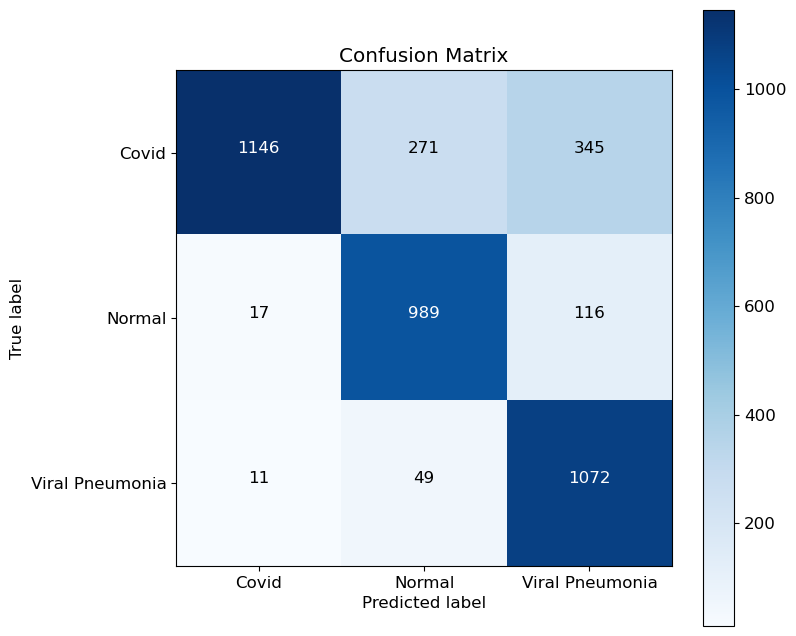

32/32 [==============================] - 1s 39ms/step

FFNN Algorithm with validation dataset

Validation accuracy: 0.29880478087649404


Classification report:
Covid precision: 0.4163265306122449
Covid recall: 0.22270742358078602
Covid F1 score: 0.2901849217638692
Normal precision: 0.2719033232628399
Normal recall: 0.3237410071942446
Normal F1 score: 0.2955665024630542
Viral Pneumonia precision: 0.2523364485981308
Viral Pneumonia recall: 0.40298507462686567
Viral Pneumonia F1 score: 0.31034482758620685
Average precision: 0.3135221008244052
Average recall: 0.31647783513396543
Average F1 score: 0.29869875060437673


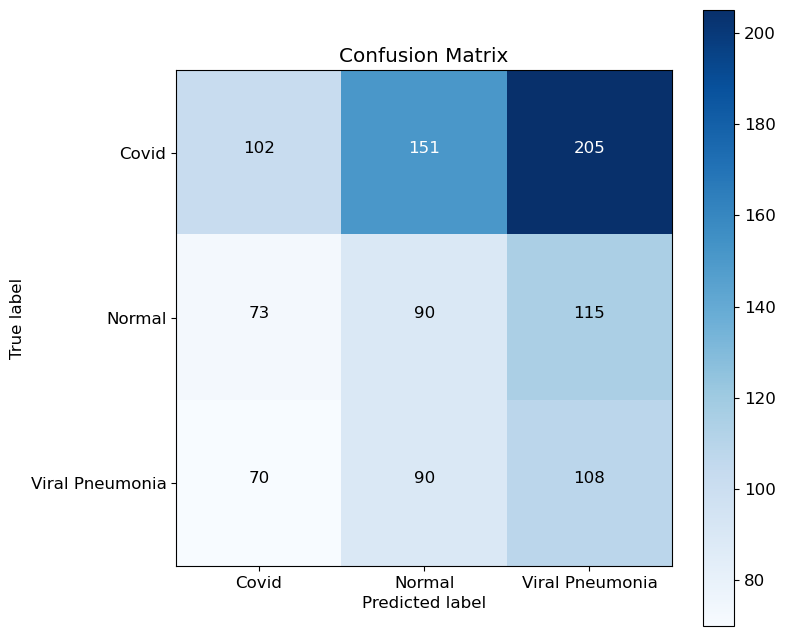

3/3 [==============================] - 0s 22ms/step

FFNN Algorithm with test dataset

Test accuracy: 0.36363636363636365


Classification report:
Covid precision: 0.3333333333333333
Covid recall: 0.07692307692307693
Covid F1 score: 0.125
Normal precision: 0.4
Normal recall: 0.7
Normal F1 score: 0.509090909090909
Viral Pneumonia precision: 0.32
Viral Pneumonia recall: 0.4
Viral Pneumonia F1 score: 0.35555555555555557
Average precision: 0.35111111111111115
Average recall: 0.39230769230769225
Average F1 score: 0.3298821548821549


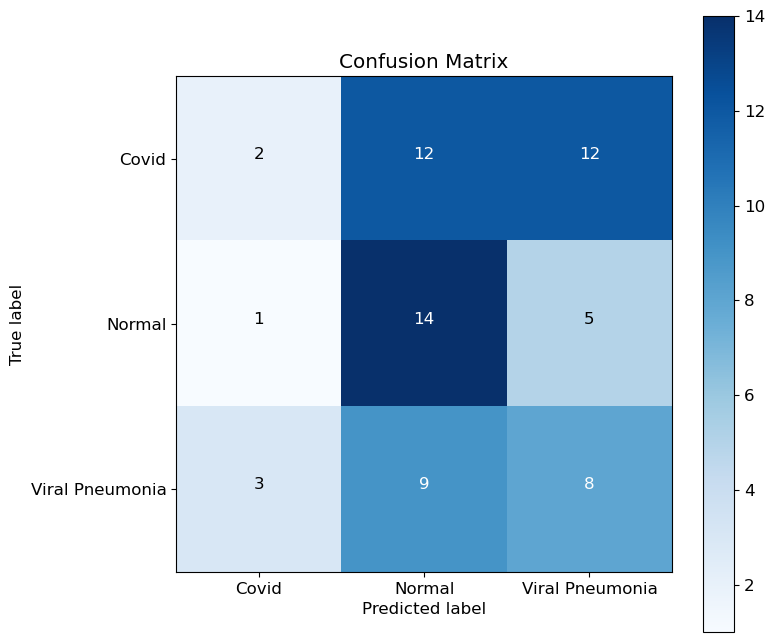

In [12]:
# Evaluate the model on the train data
train_loss, train_accuracy = ffnn.evaluate(augmented_train_images, augmented_train_labels, verbose=0)

# Generate predictions for the train data
train_predictions = ffnn.predict(augmented_train_images)

# Convert the one-hot encoded train labels to integer labels
train_true_labels = np.argmax(augmented_train_labels, axis=1)

# Convert the predicted probabilities to integer predictions
train_pred_labels = np.argmax(train_predictions, axis=1)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(train_true_labels, train_pred_labels, average=None, zero_division=1.0)
recall = recall_score(train_true_labels, train_pred_labels, average=None, zero_division=1.0)
f1 = f1_score(train_true_labels, train_pred_labels, average=None, zero_division=1.0)

# Calculate overall accuracy
accuracy = accuracy_score(train_true_labels, train_pred_labels)

# Print the train accuracy and classification report
class_names = train_data.class_names
print('\nFFNN Algorithm with train dataset\n')
print('Train accuracy:', accuracy)
print('\n')
print('Classification report:')
for i in range(len(class_names)):
    print(class_names[i], 'precision:', precision[i])
    print(class_names[i], 'recall:', recall[i])
    print(class_names[i], 'F1 score:', f1[i])
print('Average precision:', np.mean(precision))
print('Average recall:', np.mean(recall))
print('Average F1 score:', np.mean(f1))

make_confusion_matrix(y_true=train_true_labels,
                      y_pred=train_pred_labels,
                      classes=list(class_names),
                      figsize=(8, 8),
                      text_size=12)

# Evaluate the model on the validation data
validation_loss, validation_accuracy = ffnn.evaluate(augmented_validation_images, augmented_validation_labels, verbose=0)

# Generate predictions for the validation data
validation_predictions = ffnn.predict(augmented_validation_images)

# Convert the one-hot encoded validation labels to integer labels
validation_true_labels = np.argmax(augmented_validation_labels, axis=1)

# Convert the predicted probabilities to integer predictions
validation_pred_labels = np.argmax(validation_predictions, axis=1)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(validation_true_labels, validation_pred_labels, average=None, zero_division=1.0)
recall = recall_score(validation_true_labels, validation_pred_labels, average=None, zero_division=1.0)
f1 = f1_score(validation_true_labels, validation_pred_labels, average=None, zero_division=1.0)

# Calculate overall accuracy
accuracy = accuracy_score(validation_true_labels, validation_pred_labels)

# Print the validation accuracy and classification report
class_names = train_data.class_names
print('\nFFNN Algorithm with validation dataset\n')
print('Validation accuracy:', accuracy)
print('\n')
print('Classification report:')
for i in range(len(class_names)):
    print(class_names[i], 'precision:', precision[i])
    print(class_names[i], 'recall:', recall[i])
    print(class_names[i], 'F1 score:', f1[i])
print('Average precision:', np.mean(precision))
print('Average recall:', np.mean(recall))
print('Average F1 score:', np.mean(f1))

make_confusion_matrix(y_true=validation_true_labels,
                      y_pred=validation_pred_labels,
                      classes=list(class_names),
                      figsize=(8, 8),
                      text_size=12)

# Evaluate the model on the test data
test_loss, test_accuracy = ffnn.evaluate(test_images, test_labels, verbose=0)

# Generate predictions for the test data
test_predictions = ffnn.predict(test_images)

# Convert the one-hot encoded test labels to integer labels
test_true_labels = np.argmax(test_labels, axis=1)

# Convert the predicted probabilities to integer predictions
test_pred_labels = np.argmax(test_predictions, axis=1)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(test_true_labels, test_pred_labels, average=None, zero_division=1.0)
recall = recall_score(test_true_labels, test_pred_labels, average=None, zero_division=1.0)
f1 = f1_score(test_true_labels, test_pred_labels, average=None, zero_division=1.0)

# Calculate overall accuracy
accuracy = accuracy_score(test_true_labels, test_pred_labels)

# Print the test accuracy and classification report
class_names = test_data.class_names
print('\nFFNN Algorithm with test dataset\n')
print('Test accuracy:', accuracy)
print('\n')
print('Classification report:')
for i in range(len(class_names)):
    print(class_names[i], 'precision:', precision[i])
    print(class_names[i], 'recall:', recall[i])
    print(class_names[i], 'F1 score:', f1[i])
print('Average precision:', np.mean(precision))
print('Average recall:', np.mean(recall))
print('Average F1 score:', np.mean(f1))

make_confusion_matrix(y_true=test_true_labels,
                      y_pred=test_pred_labels,
                      classes=list(class_names),
                      figsize=(8, 8),
                      text_size=12)

In [5]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.utils import to_categorical

class CNNKerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=10, batch_size=32):
        self.model = model
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X, y):
        y = to_categorical(y)  # Convert labels to one-hot encoding
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=-1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_classifier(input_shape=(IMG_SIZE, IMG_SIZE, 1), num_classes=3):
    # Define the normalization and casting function
    def normalize_and_cast(x):
        return tf.cast(x, tf.float32) 

    model = models.Sequential([
        layers.Input(shape=(IMG_SIZE*IMG_SIZE, 1), dtype=tf.uint8), # Define the input shape and data type
        layers.Lambda(normalize_and_cast, name='normalize_and_cast'),  # Add the Lambda layer
        layers.Reshape(input_shape, name='reshape1'),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, name='conv2d_1'),
        layers.MaxPooling2D(pool_size=(2, 2), name='maxpooling2d_1'),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv2d_2'),
        layers.MaxPooling2D(pool_size=(2, 2), name='maxpooling2d_2'),
        layers.Conv2D(128, kernel_size=(3, 3), activation='relu', name='conv2d_3'),
        layers.MaxPooling2D(pool_size=(2, 2), name='maxpooling2d_3'),
        layers.Flatten(name='flatten_1'),
        layers.Dense(128, activation='relu', name='dense_1'),
        layers.Dense(num_classes, activation='softmax',name='dense_2')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
#     MaxPooling2D((2,2)),
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D((2,2)),
#     Conv2D(128, (3,3), activation='relu'),
#     MaxPooling2D((2,2)),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(num_classes, activation='softmax')
# ])

In [6]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.utils import to_categorical

class FFNNKerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=100):
        self.model = model
        self.epochs = epochs

    def fit(self, X, y):
        # y = to_categorical(y)  # Convert labels to one-hot encoding
        # X = X.reshape((X.shape[0], IMG_SIZE,IMG_SIZE))
        print(X.shape)
        # print(y.shape)
        # print(y)
        y_onehot = []
        for i in range(y.shape[0]):
            tmp = [0,0,0]
            tmp[y[i]]=y[i]
            # print(y[i])
            # print(tmp)
            y_onehot.append(tmp)
        y_onehot = np.array(y_onehot)
        print(y_onehot.shape)
        self.model.fit(X, y_onehot, epochs=self.epochs)
        return self

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=-1)

    def predict_proba(self, X):
        # X = X.reshape((X.shape[0], IMG_SIZE,IMG_SIZE))
        pred = self.model.predict(X)
        return pred

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
import tensorflow as tf
from tensorflow.keras import layers, models

def create_ffnn_classifier(input_shape=(IMG_SIZE, IMG_SIZE, 1), num_classes=3):
    # Define the normalization and casting function
    def normalize_and_cast(x):
        return tf.cast(x, tf.float32) 
    # expected shape=(None, 50176, 1), found shape=(None, 224, 224)
    model = models.Sequential([
        layers.Input(shape=(IMG_SIZE*IMG_SIZE, 1), dtype=tf.uint8), # Define the input shape and data type
        layers.Lambda(normalize_and_cast, name='normalize_and_cast'),  # Add the Lambda layer
        layers.Reshape(input_shape, name='reshape1'),
        layers.Flatten(input_shape=(224, 224, 1), name='Flatten_1'),
        layers.Dense(512, activation='relu', name = 'Dense_1'),
        layers.Dense(256, activation='relu', name = 'Dense_2'),
        layers.Dense(128, activation='relu', name = 'Dense_3'),
        layers.Dense(num_classes, activation='softmax', name = 'Dense_4')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ffnn = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(224, 224, 1), name='Flatten_1'),
#     tf.keras.layers.Dense(512, activation='relu', name = 'Dense_1'),
#     tf.keras.layers.Dense(256, activation='relu', name = 'Dense_2'),
#     tf.keras.layers.Dense(128, activation='relu', name = 'Dense_3'),
#     tf.keras.layers.Dense(num_classes, activation='softmax', name = 'Dense_4')
# ])


# optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

# # Compile the model
# ffnn.compile(optimizer=optimizer,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [7]:
# Ensemble Learning

import os
import cv2
import numpy as np
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from keras.wrappers.scikit_learn import KerasClassifier

# Set up the paths to the train and test directories
train_dir = 'Covid19-dataset/train'
test_dir = 'Covid19-dataset/test'

# Set up the classes
classes = ['Covid', 'Normal', 'Viral Pneumonia']


# Load the training data
train_images = []
train_labels = []
for cls in classes:
    path = os.path.join(train_dir, cls)
    class_num = classes.index(cls)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        img_arr = img_arr.flatten()  # Flatten the input image
        train_images.append(img_arr)
        train_labels.append(class_num)

# Load the testing data
test_images = []
test_labels = []
for cls in classes:
    path = os.path.join(test_dir, cls)
    class_num = classes.index(cls)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        # print(img_arr.shape)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        # print(img_arr.shape)
        img_arr = img_arr.flatten()  # Flatten the input image
        # print(img_arr.shape)
        test_images.append(img_arr)
        test_labels.append(class_num)

# Convert the data to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

augmented_images = []
augmented_labels = []

n_train_samples = train_images.shape[0]

for i in range(n_train_samples):
    image = train_images[i].reshape(IMG_SIZE, IMG_SIZE, 1)
    label = train_labels[i]
    for _ in range(factor):
        augmented_image = data_augmentation(image)
        # X_train.reshape(31500, 28, 28, 1)
        # print(augmented_image.shape)
        augmented_images.append(augmented_image)
        augmented_labels.append(label)

augmented_images = np.array(augmented_images)
augmented_images = augmented_images.reshape((augmented_images.shape[0] ,-1))
augmented_labels = np.array(augmented_labels)

augmented_train_images, augmented_validation_images, augmented_train_labels, augmented_validation_labels = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

# print(train_data.shape)

In [8]:
# Initialize the classifiers
# knn = KNeighborsClassifier(n_neighbors=3)
# svm = SVC(kernel='linear', probability=True)
# Define the k-NN classifier and fit it to the training data
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
# Define the SVM classifier and fit it to the training data
svm = SVC(kernel='linear', C=1, probability=True, random_state=42)
ffnn_model = FFNNKerasClassifierWrapper(create_ffnn_classifier(), epochs=100)
cnn_model = CNNKerasClassifierWrapper(create_cnn_classifier(), epochs=10)

# Create the ensemble classifier
ensemble = VotingClassifier(estimators=[
    ('ffn', ffnn_model),
    ('cnn', cnn_model),
    ('knn', knn), 
    ('svm', svm), 
    ], voting='soft', verbose=True)
# ensemble = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('ffn', ffn)], voting='soft')
# ensemble = VotingClassifier(estimators=[('cnn', cnn_model)], voting='soft', verbose=True)

# Train the ensemble classifier
print(augmented_train_images.shape)
ensemble.fit(augmented_train_images, augmented_train_labels)

(4016, 50176)
INFO:tensorflow:Assets written to: ram://e1cecf6e-822a-4cc9-b4db-a964cfb4836d/assets
(4016, 50176)
(4016, 3)
Epoch 1/100
126/126 [==============================] - 9s 66ms/step - loss: 14.6091 - accuracy: 0.3683
Epoch 2/100
126/126 [==============================] - 9s 69ms/step - loss: 23.0022 - accuracy: 0.4004
Epoch 3/100
126/126 [==============================] - 8s 67ms/step - loss: 28.5203 - accuracy: 0.4004
Epoch 4/100
126/126 [==============================] - 8s 67ms/step - loss: 41.3832 - accuracy: 0.4029
Epoch 5/100
126/126 [==============================] - 8s 66ms/step - loss: 67.2767 - accuracy: 0.4121
Epoch 6/100
126/126 [==============================] - 8s 67ms/step - loss: 72.8595 - accuracy: 0.4081
Epoch 7/100
126/126 [==============================] - 8s 66ms/step - loss: 64.1933 - accuracy: 0.4069
Epoch 8/100
126/126 [==============================] - 8s 67ms/step - loss: 101.7926 - accuracy: 0.4044
Epoch 9/100
126/126 [==============================]

INFO:tensorflow:Assets written to: ram://275d43fc-9351-4bfe-8d90-407f88822c55/assets


INFO:tensorflow:Assets written to: ram://275d43fc-9351-4bfe-8d90-407f88822c55/assets


[Voting] ...................... (2 of 4) Processing cnn, total=18.2min
[Voting] ...................... (3 of 4) Processing knn, total=   0.1s
[Voting] ...................... (4 of 4) Processing svm, total=18.5min


VotingClassifier(estimators=[('ffn',
                              FFNNKerasClassifierWrapper(model=<keras.engine.sequential.Sequential object at 0x7fc0458eb7f0>)),
                             ('cnn',
                              CNNKerasClassifierWrapper(model=<keras.engine.sequential.Sequential object at 0x7fc022999120>)),
                             ('knn', KNeighborsClassifier()),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42))],
                 verbose=True, voting='soft')

(4016, 50176)
126/126 [==============================] - 37s 297ms/step
Ensemble Learning with train dataset

Classification report:
                 precision    recall  f1-score   support

          Covid       0.99      0.99      0.99      1756
         Normal       1.00      0.77      0.87      1144
Viral Pneumonia       0.81      1.00      0.90      1116

       accuracy                           0.93      4016
      macro avg       0.93      0.92      0.92      4016
   weighted avg       0.94      0.93      0.93      4016

[0 1 2]


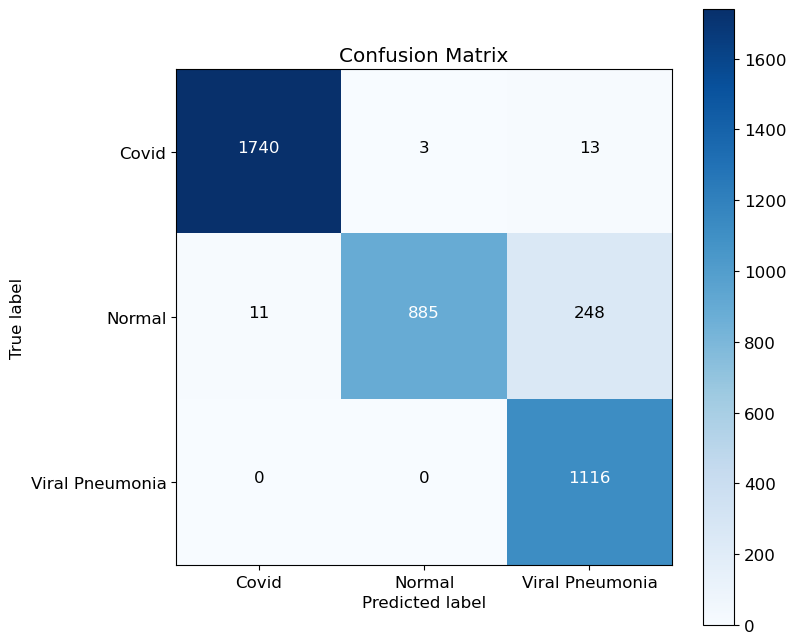

(1004, 50176)
32/32 [==============================] - 10s 313ms/step
Ensemble Learning with validation dataset

Classification report:
                 precision    recall  f1-score   support

          Covid       0.86      0.85      0.86       464
         Normal       0.70      0.32      0.44       256
Viral Pneumonia       0.61      0.93      0.74       284

       accuracy                           0.74      1004
      macro avg       0.73      0.70      0.68      1004
   weighted avg       0.75      0.74      0.72      1004

[0 1 2]


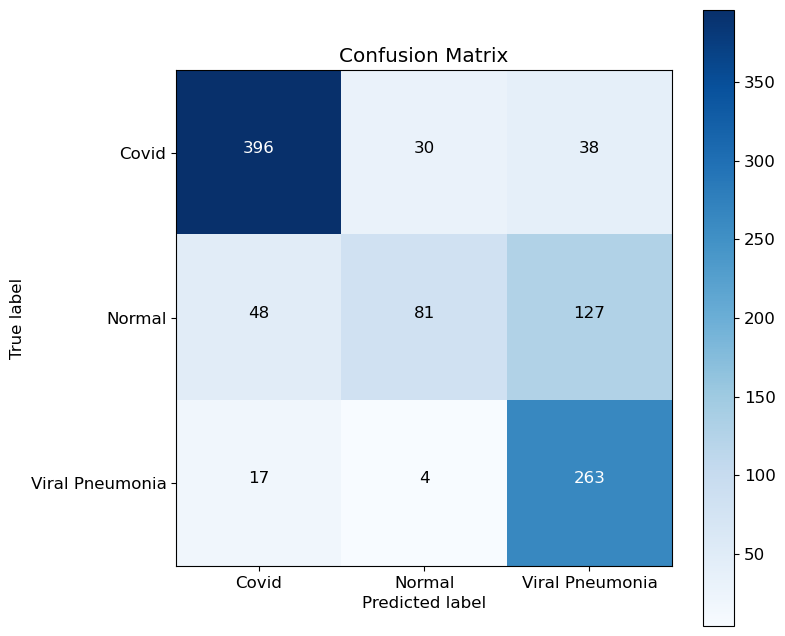

(66, 50176)
3/3 [==============================] - 1s 166ms/step
Ensemble Learning with test dataset

Classification report:
                 precision    recall  f1-score   support

          Covid       0.95      0.77      0.85        26
         Normal       1.00      0.05      0.10        20
Viral Pneumonia       0.43      0.95      0.59        20

       accuracy                           0.61        66
      macro avg       0.79      0.59      0.51        66
   weighted avg       0.81      0.61      0.54        66

[0 1 2]


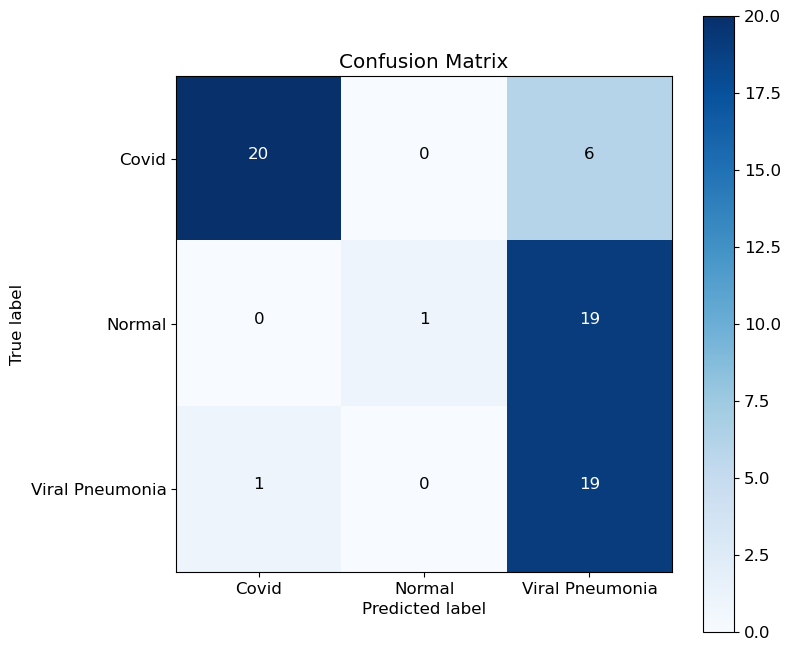

In [9]:
# Test the ensemble classifier
print(augmented_train_images.shape)
augmented_train_predictions = ensemble.predict(augmented_train_images)
print('Ensemble Learning with train dataset\n')
print('Classification report:')
print(classification_report(augmented_train_labels, augmented_train_predictions, target_names=classes))
print(ensemble.classes_)
make_confusion_matrix(y_true=augmented_train_labels,
                      y_pred=augmented_train_predictions,
                      classes=list(classes),
                      figsize=(8, 8),
                      text_size=12)

# Test the ensemble classifier
print(augmented_validation_images.shape)
augmented_validation_predictions = ensemble.predict(augmented_validation_images)
print('Ensemble Learning with validation dataset\n')
print('Classification report:')
print(classification_report(augmented_validation_labels, augmented_validation_predictions, target_names=classes))
print(ensemble.classes_)
make_confusion_matrix(y_true=augmented_validation_labels,
                      y_pred=augmented_validation_predictions,
                      classes=list(classes),
                      figsize=(8, 8),
                      text_size=12)

# Test the ensemble classifier
print(test_images.shape)
predictions = ensemble.predict(test_images)
print('Ensemble Learning with test dataset\n')
print('Classification report:')
print(classification_report(test_labels, predictions, target_names=classes))
print(ensemble.classes_)
make_confusion_matrix(y_true=test_labels,
                      y_pred=predictions,
                      classes=list(classes),
                      figsize=(8, 8),
                      text_size=12)